# Case Study by: Mohammed Saqlain Attar

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt
from sklearn import metrics

In [5]:
digits = datasets.load_digits()

In [6]:
x = pd.DataFrame(digits.data)
y = digits.target

## 1.We shall use the same dataset used in previous assignment -digits.Make a 80-20 train/test split.[Hint:Explore datasets module from scikit learn]

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 10)

## 2.Using scikit learn perform a LDA on the dataset. Find out the number of components in the projected subspace.[Hint:Refer to discriminant analysis moduleof scikit learn]

In [50]:
lda = LDA(n_components=7)

lda.fit(x_train,y_train)

(lda.explained_variance_ratio_).sum()

0.9485480645255182

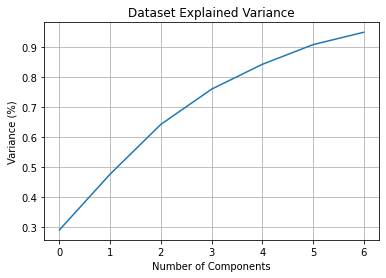

In [51]:
plt.figure()
plt.plot(np.cumsum(lda.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Dataset Explained Variance')
plt.grid(True)
plt.show()

## 3.Transform the dataset and fit a logistic regression and observe the accuracy. Compare it with the previous model based on PCA in terms of accuracy and model complexity.[Hint: Project both the train and test samples to the new subspace

In [52]:
x_train = lda.transform(x_train)

In [53]:
x_test = lda.transform(x_test)

In [54]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [55]:
model.fit(x_train,y_train)

LogisticRegression()

In [56]:
y_pred = model.predict(x_test)

In [57]:
metrics.accuracy_score(y_test,y_pred)

0.9194444444444444